In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [164]:
#https://www.kaggle.com/datasets/lodetomasi1995/income-classification

In [165]:
df = pd.read_csv("income_evaluation.csv")

In [245]:
#EDA

In [166]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [167]:
df.shape

(32561, 15)

In [168]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [169]:
df.columns = df.columns.str.replace("-", "_").str.replace("fnlwgt", "finalweight").str.strip()

In [170]:
df.columns

Index(['age', 'workclass', 'finalweight', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   finalweight     32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [172]:
df.describe()

,age,finalweight,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [173]:
categorical = [col for col in df.columns if df[col].dtype == "O"]
numerical = [col for col in df.columns if df[col].dtype != "O"]

In [174]:
categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [175]:
numerical

['age',
 'finalweight',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

In [176]:
for col in categorical:
    print(df[col].value_counts())
    print("-------------")

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
-------------
education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64
-------------
marital_status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64
-------------
occupation
Prof-specialty       4140
Craft

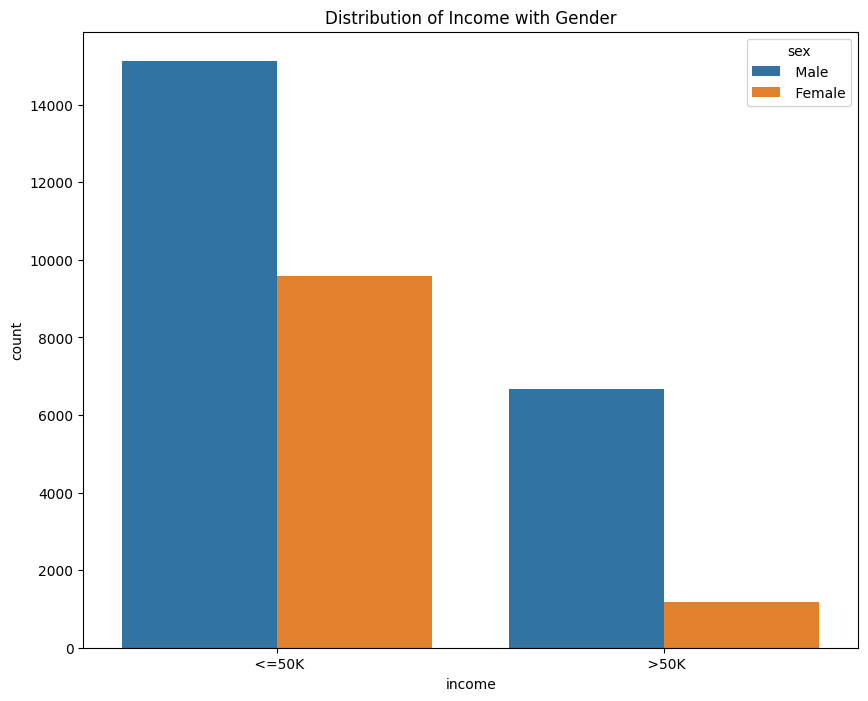

In [177]:
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.countplot(data=df, x="income", hue="sex")
ax.set_title("Distribution of Income with Gender")
plt.show()

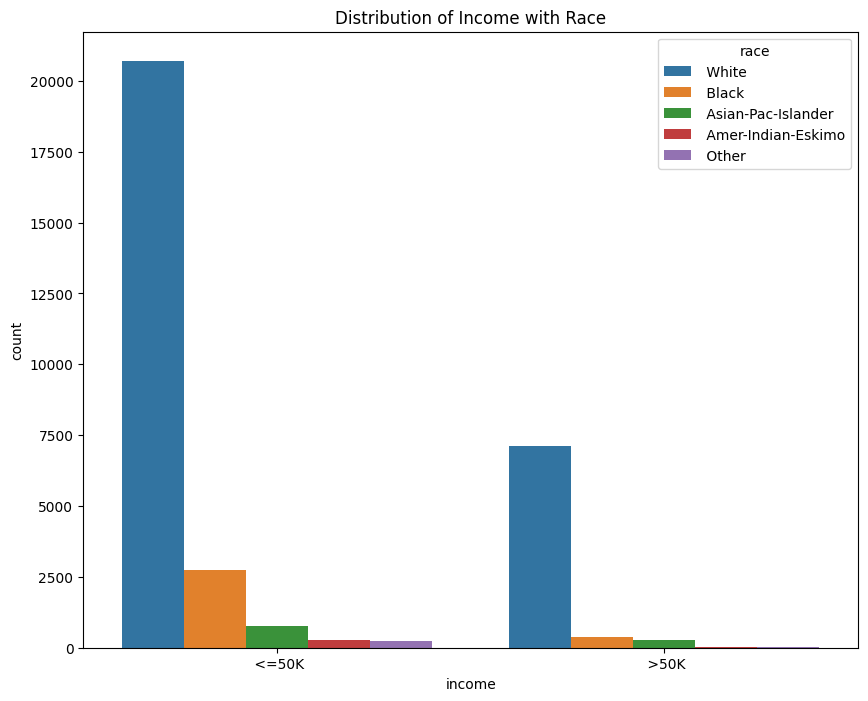

In [178]:
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.countplot(data=df, x="income", hue="race")
ax.set_title("Distribution of Income with Race")
plt.show()

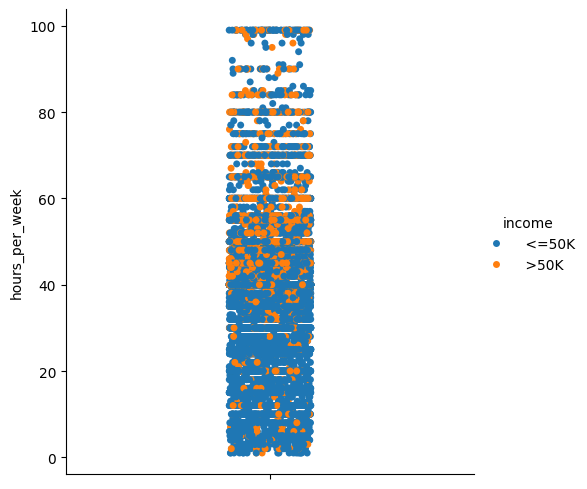

In [179]:
sns.catplot(y=df["hours_per_week"], hue=df["income"])

plt.show()

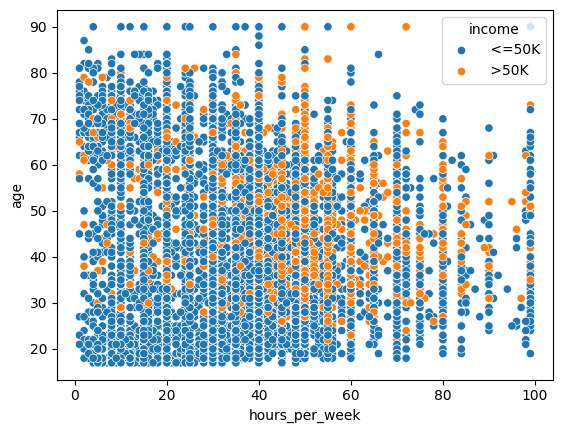

In [180]:
sns.scatterplot(x=df["hours_per_week"], y=df["age"], hue=df["income"])

plt.show()

In [181]:
over_40_hours = df[df["hours_per_week"] > 40]
under_40_hours = df[df["hours_per_week"] <= 40]

In [182]:
over_40_hours["income"].value_counts()

income
<=50K    5725
>50K     3856
Name: count, dtype: int64

In [183]:
under_40_hours["income"].value_counts()

income
<=50K    18995
>50K      3985
Name: count, dtype: int64

In [184]:
3856 / (3856+5725) #40% of the people who work 40+ hours make more than $50k annually

0.4024632084333577

In [185]:
3985 / (3985+18995) #Only 17% of the people who work 40 hours or less make $50k annually

0.17341166231505656

In [246]:
#Data Cleaning

In [186]:
categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [187]:
df["workclass"].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [188]:
df["workclass"] = df["workclass"].replace(" ?", np.nan)

In [189]:
df["workclass"].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [190]:
df["occupation"].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [191]:
df["occupation"] = df["occupation"].replace(" ?", np.nan)

In [192]:
df["occupation"].value_counts()

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

In [193]:
df["native_country"].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [194]:
df["native_country"] = df["native_country"].replace(" ?", np.nan)

In [195]:
df["native_country"].isnull().sum()

np.int64(583)

In [196]:
df.isnull().sum()

age                  0
workclass         1836
finalweight          0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

In [198]:
X = df.drop("income", axis=1)

y = df["income"]

In [247]:
#Splitting

In [199]:
from sklearn.model_selection import train_test_split

In [200]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [248]:
#Feature Engineering

In [201]:
categorical_X = [col for col in X_train.columns if X_train[col].dtype == "O"]

In [202]:
X_train[categorical_X].isnull().sum()

workclass         1276
education            0
marital_status       0
occupation        1278
relationship         0
race                 0
sex                  0
native_country     414
dtype: int64

In [203]:
X_test[categorical_X].isnull().sum()

workclass         560
education           0
marital_status      0
occupation        565
relationship        0
race                0
sex                 0
native_country    169
dtype: int64

In [204]:
X_train["workclass"].mode()[0]

' Private'

In [205]:
for i in [X_train, X_test]:
    i["workclass"] = i["workclass"].fillna(X_train["workclass"].mode()[0])
    i["occupation"] = i["occupation"].fillna(X_train["occupation"].mode()[0])
    i["native_country"] = i["native_country"].fillna(X_train["native_country"].mode()[0])

In [206]:
X_train[categorical_X].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64

In [207]:
X_test[categorical_X].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64

In [208]:
X_train[categorical_X].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country
32098,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
25206,State-gov,HS-grad,Divorced,Adm-clerical,Unmarried,White,Female,United-States
23491,Private,Some-college,Married-civ-spouse,Sales,Husband,White,Male,United-States
12367,Private,HS-grad,Never-married,Craft-repair,Not-in-family,White,Male,Guatemala
7054,Private,7th-8th,Never-married,Craft-repair,Not-in-family,White,Male,Germany


In [209]:
y_train_binary = y_train.apply(lambda x: 1 if x.strip() == ">50K" else 0)

In [210]:
target_means = y_train_binary.groupby(X_train["native_country"]).mean()

In [211]:
X_train["native_country_encoded"] = X_train["native_country"].map(target_means)
X_train["native_country_encoded"] = X_train["native_country_encoded"].fillna(y_train_binary.mean())

X_test["native_country_encoded"] = X_test["native_country"].map(target_means)
X_test["native_country_encoded"] = X_test["native_country_encoded"].fillna(y_train_binary.mean())

In [212]:
X_train.head()

,age,workclass,finalweight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,native_country_encoded
32098,45,Private,170871,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,7298,0,60,United-States,0.245722
25206,47,State-gov,108890,HS-grad,9,Divorced,Adm-clerical,Unmarried,White,Female,1831,0,38,United-States,0.245722
23491,48,Private,187505,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,United-States,0.245722
12367,29,Private,145592,HS-grad,9,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Guatemala,0.041667
7054,23,Private,203003,7th-8th,4,Never-married,Craft-repair,Not-in-family,White,Male,0,0,25,Germany,0.284091


In [213]:
X_train.drop("native_country", axis=1, inplace=True)
X_test.drop("native_country", axis=1, inplace=True)

In [214]:
categorical_X

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [215]:
one_hot_categories = ['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex'
 ]

In [249]:
#Encoding

In [216]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [217]:
preprocessor = ColumnTransformer(
    transformers=[
        ("one_hot", OneHotEncoder(handle_unknown="ignore", sparse_output=False), one_hot_categories)
    ],
    remainder="passthrough"
)

In [218]:
X_train_enc = preprocessor.fit_transform(X_train)
X_test_enc = preprocessor.transform(X_test)

In [219]:
X_train_enc

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
        60.        ,  0.24572168],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        38.        ,  0.24572168],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        50.        ,  0.24572168],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        40.        ,  0.24572168],
       [ 0.        ,  1.        ,  0.        , ...,  0.        ,
        45.        ,  0.24572168],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        48.        ,  0.24572168]], shape=(22792, 65))

In [220]:
columns = preprocessor.get_feature_names_out()

In [221]:
X_train = pd.DataFrame(X_train_enc, columns=columns, index=X_train.index)
X_test = pd.DataFrame(X_test_enc, columns=columns, index=X_test.index)

In [222]:
X_train.head()

,one_hot__workclass_ Federal-gov,one_hot__workclass_ Local-gov,one_hot__workclass_ Never-worked,one_hot__workclass_ Private,one_hot__workclass_ Self-emp-inc,one_hot__workclass_ Self-emp-not-inc,one_hot__workclass_ State-gov,one_hot__workclass_ Without-pay,one_hot__education_ 10th,one_hot__education_ 11th,...,one_hot__race_ White,one_hot__sex_ Female,one_hot__sex_ Male,remainder__age,remainder__finalweight,remainder__education_num,remainder__capital_gain,remainder__capital_loss,remainder__hours_per_week,remainder__native_country_encoded
32098,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,45.0,170871.0,9.0,7298.0,0.0,60.0,0.245722
25206,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,47.0,108890.0,9.0,1831.0,0.0,38.0,0.245722
23491,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,48.0,187505.0,10.0,0.0,0.0,50.0,0.245722
12367,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,29.0,145592.0,9.0,0.0,0.0,40.0,0.041667
7054,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,23.0,203003.0,4.0,0.0,0.0,25.0,0.284091


In [223]:
cols = X_train.columns

In [224]:
from sklearn.preprocessing import RobustScaler

In [225]:
scaler = RobustScaler()

In [226]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [227]:
X_train = pd.DataFrame(X_train, columns=cols)
X_test = pd.DataFrame(X_test, columns=cols)

In [250]:
#Training

In [228]:
from sklearn.ensemble import RandomForestClassifier

In [229]:
rfc = RandomForestClassifier(n_estimators=10, random_state=15)

rfc.fit(X_train, y_train)

,n_estimators,10
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [230]:
y_pred = rfc.predict(X_test)

In [231]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [232]:
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.8470672535571706
              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      7407
        >50K       0.73      0.59      0.65      2362

    accuracy                           0.85      9769
   macro avg       0.80      0.76      0.78      9769
weighted avg       0.84      0.85      0.84      9769

[[6886  521]
 [ 973 1389]]


In [233]:
rfc = RandomForestClassifier(n_estimators=100, random_state=15)

rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.8537209540382844
              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      7407
        >50K       0.73      0.62      0.67      2362

    accuracy                           0.85      9769
   macro avg       0.81      0.77      0.79      9769
weighted avg       0.85      0.85      0.85      9769

[[6870  537]
 [ 892 1470]]


In [251]:
#Dropping unnecessary features

In [234]:
rfc.feature_importances_

array([5.89915888e-03, 5.82375187e-03, 7.14292998e-06, 1.12395409e-02,
       5.45950100e-03, 9.14446600e-03, 4.95867851e-03, 7.49970941e-05,
       1.26676685e-03, 1.78936666e-03, 8.44081442e-04, 2.49805089e-04,
       3.53321264e-04, 1.49032443e-03, 1.07900514e-03, 2.45097237e-03,
       3.15104569e-03, 1.08197880e-02, 2.65277844e-03, 6.84630198e-03,
       7.92194647e-03, 2.85857892e-05, 4.02750221e-03, 5.92388104e-03,
       6.13768337e-03, 2.84733479e-04, 6.17521057e-02, 9.80661116e-04,
       2.54875412e-02, 1.67947319e-03, 1.71908968e-03, 5.54312037e-03,
       2.27790711e-05, 8.36620649e-03, 1.89641500e-02, 3.77276733e-03,
       3.09264886e-03, 4.42875165e-03, 7.56797784e-03, 9.70846089e-05,
       1.37068011e-02, 3.06774138e-03, 7.40362575e-03, 5.15548967e-03,
       5.31269539e-03, 4.44090385e-02, 9.48837044e-03, 1.44590705e-03,
       9.48597008e-03, 4.50150645e-03, 1.01949978e-02, 1.37613012e-03,
       3.39643432e-03, 4.90775153e-03, 8.37231704e-04, 7.03575103e-03,
      

In [235]:
feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)

In [236]:
feature_scores

remainder__finalweight                  0.159946
remainder__age                          0.148629
remainder__capital_gain                 0.095961
remainder__hours_per_week               0.084592
remainder__education_num                0.071245
                                          ...   
one_hot__occupation_ Priv-house-serv    0.000097
one_hot__workclass_ Without-pay         0.000075
one_hot__education_ Preschool           0.000029
one_hot__occupation_ Armed-Forces       0.000023
one_hot__workclass_ Never-worked        0.000007
Length: 65, dtype: float64

In [237]:
feature_scores.tail(10)

one_hot__education_ 12th                      0.000844
one_hot__race_ Other                          0.000837
one_hot__education_ 5th-6th                   0.000353
one_hot__marital_status_ Married-AF-spouse    0.000285
one_hot__education_ 1st-4th                   0.000250
one_hot__occupation_ Priv-house-serv          0.000097
one_hot__workclass_ Without-pay               0.000075
one_hot__education_ Preschool                 0.000029
one_hot__occupation_ Armed-Forces             0.000023
one_hot__workclass_ Never-worked              0.000007
dtype: float64

In [238]:
X_train.drop(
    [
    "one_hot__education_ 12th",
    "one_hot__race_ Other",
    "one_hot__education_ 5th-6th",
    "one_hot__marital_status_ Married-AF-spouse",
    "one_hot__education_ 1st-4th",
    "one_hot__occupation_ Priv-house-serv",
    "one_hot__workclass_ Without-pay",
    "one_hot__education_ Preschool",
    "one_hot__occupation_ Armed-Forces",
    "one_hot__workclass_ Never-worked"
],
axis=1,
inplace=True
)

X_test.drop(
    [
    "one_hot__education_ 12th",
    "one_hot__race_ Other",
    "one_hot__education_ 5th-6th",
    "one_hot__marital_status_ Married-AF-spouse",
    "one_hot__education_ 1st-4th",
    "one_hot__occupation_ Priv-house-serv",
    "one_hot__workclass_ Without-pay",
    "one_hot__education_ Preschool",
    "one_hot__occupation_ Armed-Forces",
    "one_hot__workclass_ Never-worked"
],
axis=1,
inplace=True
)

In [252]:
#Training a stronger model

In [239]:
rfc = RandomForestClassifier(n_estimators=100, random_state=15)

rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.853618589415498
              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      7407
        >50K       0.73      0.62      0.67      2362

    accuracy                           0.85      9769
   macro avg       0.81      0.78      0.79      9769
weighted avg       0.85      0.85      0.85      9769

[[6864  543]
 [ 887 1475]]


In [253]:
#Hyperparameter tuning

In [240]:
from sklearn.model_selection import RandomizedSearchCV

In [241]:
param_grid = {
    "n_estimators": [100, 200, 500, 1000],
    "max_depth": [5, 8, 10, 15, None],
    "max_features": ["sqrt", "log2", 5, 6, 7, 8],
    "min_samples_split": [2, 8, 15, 20]
}

In [242]:
rfc = RandomForestClassifier()

In [243]:
rscv = RandomizedSearchCV(estimator=rfc, param_distributions=param_grid, cv=3, n_jobs=-1)

rscv.fit(X_train, y_train)

y_pred = rscv.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.8632408639574163
              precision    recall  f1-score   support

       <=50K       0.89      0.94      0.91      7407
        >50K       0.76      0.63      0.69      2362

    accuracy                           0.86      9769
   macro avg       0.83      0.78      0.80      9769
weighted avg       0.86      0.86      0.86      9769

[[6945  462]
 [ 874 1488]]


In [244]:
rscv.best_params_

{'n_estimators': 500,
 'min_samples_split': 20,
 'max_features': 7,
 'max_depth': None}